In [4]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt, ticker as mticker

In [5]:
sic_ensemble = [pd.read_csv(f"/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/lead_time_2/swapped/seed_{i}/weights_21021550_overwritten_sic.csv", index_col = 0) for i in range(1,11)]
trend_ensemble = [pd.read_csv(f"/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/lead_time_2/swapped/seed_{i}/weights_21021550_overwritten_trend.csv", index_col = 0) for i in range(1,11)]
lsmask_ensemble = [pd.read_csv(f"/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/lead_time_2/swapped/seed_{i}/weights_21021550_overwritten_lsmask.csv", index_col = 0) for i in range(1,11)]
t2m_ensemble = [pd.read_csv(f"/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/lead_time_2/swapped/seed_{i}/weights_21021550_overwritten_t2m.csv", index_col = 0) for i in range(1,11)]
xwind_ensemble = [pd.read_csv(f"/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/lead_time_2/swapped/seed_{i}/weights_21021550_overwritten_xwind.csv", index_col = 0) for i in range(1,11)]
ywind_ensemble = [pd.read_csv(f"/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/lead_time_2/swapped/seed_{i}/weights_21021550_overwritten_ywind.csv", index_col = 0) for i in range(1,11)]

persistence = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/lead_time_2/persistence.csv", index_col = 0)
baseline = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/ForecastValidation/lead_time_2/weights_21021550.csv", index_col = 0)

In [7]:
# Define met seasons

meteorological_seasons = [0,0,1,1,1,2,2,2,3,3,3,0]
seasonal_names = ['DJF', 'MAM', 'JJA', 'SON']
months = pd.date_range('2022-01-01','2023-01-01', freq='MS').strftime("%Y-%m-%d").tolist()

In [8]:
for member in range(10):
    for i, idx in zip(range(len(months) - 1), meteorological_seasons):
        sic_ensemble[member].loc[(sic_ensemble[member].index >= months[i]) & (sic_ensemble[member].index < months[i+1]), 'met_index'] = seasonal_names[idx]
        trend_ensemble[member].loc[(trend_ensemble[member].index >= months[i]) & (trend_ensemble[member].index < months[i+1]), 'met_index'] = seasonal_names[idx]
        lsmask_ensemble[member].loc[(lsmask_ensemble[member].index >= months[i]) & (lsmask_ensemble[member].index < months[i+1]), 'met_index'] = seasonal_names[idx]
        t2m_ensemble[member].loc[(t2m_ensemble[member].index >= months[i]) & (t2m_ensemble[member].index < months[i+1]), 'met_index'] = seasonal_names[idx]
        xwind_ensemble[member].loc[(xwind_ensemble[member].index >= months[i]) & (xwind_ensemble[member].index < months[i+1]), 'met_index'] = seasonal_names[idx]
        ywind_ensemble[member].loc[(ywind_ensemble[member].index >= months[i]) & (ywind_ensemble[member].index < months[i+1]), 'met_index'] = seasonal_names[idx]

for i, idx in zip(range(len(months) - 1), meteorological_seasons):
    persistence.loc[(persistence.index >= months[i]) & (persistence.index < months[i+1]), 'met_index'] = seasonal_names[idx]
    baseline.loc[(baseline.index >= months[i]) & (baseline.index < months[i+1]), 'met_index'] = seasonal_names[idx]

In [9]:
sic_groupings = np.squeeze(np.array([sic_ensemble[i][['NIIEE_2', 'met_index']].groupby('met_index', sort=False).mean().to_numpy() for i in range(10)]), axis = -1)
trend_groupings = np.squeeze(np.array([trend_ensemble[i][['NIIEE_2', 'met_index']].groupby('met_index', sort=False).mean().to_numpy() for i in range(10)]), axis = -1)
lsmask_groupings = np.squeeze(np.array([lsmask_ensemble[i][['NIIEE_2', 'met_index']].groupby('met_index', sort=False).mean().to_numpy() for i in range(10)]), axis = -1)
t2m_groupings = np.squeeze(np.array([t2m_ensemble[i][['NIIEE_2', 'met_index']].groupby('met_index', sort=False).mean().to_numpy() for i in range(10)]), axis = -1)
xwind_groupings = np.squeeze(np.array([xwind_ensemble[i][['NIIEE_2', 'met_index']].groupby('met_index', sort=False).mean().to_numpy() for i in range(10)]), axis = -1)
ywind_groupings = np.squeeze(np.array([ywind_ensemble[i][['NIIEE_2', 'met_index']].groupby('met_index', sort=False).mean().to_numpy() for i in range(10)]), axis = -1)


persistence_seasons = persistence[['NIIEE_2', 'met_index']].groupby('met_index', sort=False).mean().to_numpy()
baseline_seasons = baseline[['NIIEE_2', 'met_index']].groupby('met_index', sort=False).mean().to_numpy()

In [21]:
sic_groupings.shape

(10, 4)

In [10]:
sic_ensemble_mean = np.mean(sic_groupings, axis=0)
sic_ensemble_std = np.std(sic_groupings, axis = 0)

trend_ensemble_mean = np.mean(trend_groupings, axis=0)
trend_ensemble_std = np.std(trend_groupings, axis = 0)

lsmask_ensemble_mean = np.mean(lsmask_groupings, axis=0)
lsmask_ensemble_std = np.std(lsmask_groupings, axis = 0)

t2m_ensemble_mean = np.mean(t2m_groupings, axis=0)
t2m_ensemble_std = np.std(t2m_groupings, axis = 0)

xwind_ensemble_mean = np.mean(xwind_groupings, axis=0)
xwind_ensemble_std = np.std(xwind_groupings, axis = 0)

ywind_ensemble_mean = np.mean(ywind_groupings, axis=0)
ywind_ensemble_std = np.std(ywind_groupings, axis = 0)


print(f"{trend_ensemble_mean=}")
print(f"{trend_ensemble_std=}")

print(f"{lsmask_ensemble_mean=}")
print(f"{lsmask_ensemble_std=}")

print(f"{baseline_seasons.T[0]=}")

trend_ensemble_mean=array([31.37182436, 31.84466822, 29.32885325, 20.88870905])
trend_ensemble_std=array([0.12093276, 0.09790829, 0.0477771 , 0.08544885])
lsmask_ensemble_mean=array([31.26741702, 31.60774796, 29.41985986, 20.96320973])
lsmask_ensemble_std=array([7.10542736e-15, 3.55271368e-15, 0.00000000e+00, 3.55271368e-15])
baseline_seasons.T[0]=array([31.26741702, 31.60774796, 29.41985986, 20.96320973])


Text(0.5, 1.0, '2022 predictions with swapped predictor, 10 different permutations')

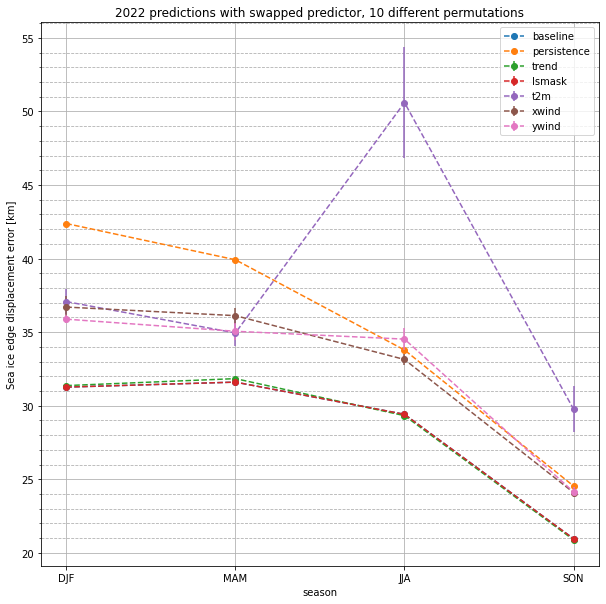

In [11]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot()
ax.plot(baseline_seasons, 'o--', label = 'baseline')
ax.plot(persistence_seasons, 'o--', label = 'persistence')

# ax.errorbar(range(4), sic_ensemble_mean, sic_ensemble_std, marker = 'o', ls = '--', label = 'sic')
ax.errorbar(range(4), trend_ensemble_mean, trend_ensemble_std, marker = 'o', ls = '--', label = 'trend')
ax.errorbar(range(4), lsmask_ensemble_mean, lsmask_ensemble_std, marker = 'o', ls = '--', label = 'lsmask')
ax.errorbar(range(4), t2m_ensemble_mean, t2m_ensemble_std, marker = 'o', ls = '--', label = 't2m')
ax.errorbar(range(4), xwind_ensemble_mean, xwind_ensemble_std, marker = 'o', ls = '--', label = 'xwind')
ax.errorbar(range(4), ywind_ensemble_mean, ywind_ensemble_std, marker = 'o', ls = '--', label = 'ywind')

ax.yaxis.set_minor_locator(mticker.AutoMinorLocator())
ax.set_xticks(range(4), ['DJF', 'MAM', 'JJA', 'SON'])


ax.set_xlabel('season')
ax.set_ylabel('Sea ice edge displacement error [km]')
plt.legend()
plt.grid(which = 'minor', ls = '--')
plt.grid(which = 'major')
ax.set_title('2022 predictions with swapped predictor, 10 different permutations')